In [10]:
from evalVAE import *

In [11]:
path = '../5-Results/bengal/0812/train2/'
model_path=path+'/model.h5'
data_path =path+'../pre/x_train.npy'

In [12]:
x_train = np.load(data_path)
print(x_train.shape)

model = tf.keras.models.load_model(model_path, compile=False)
model.summary()

(51721, 128, 64, 1)
Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 64, 1)]      0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 357284    
_________________________________________________________________
decoder (Model)              (None, 128, 64, 1)        357761    
Total params: 715,045
Trainable params: 715,045
Non-trainable params: 0
_________________________________________________________________


In [13]:
z, x_rec = get_z_rec(x_train, model)#, path)

KeyboardInterrupt: 

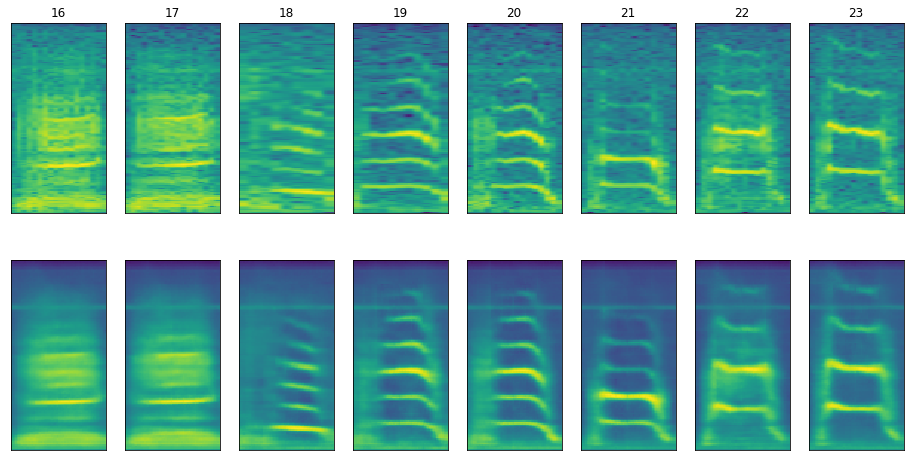

In [6]:
plot_recimg(x_train, x_rec, 2)

In [70]:
decoder = model.layers[2]

In [74]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               768       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              263168    
_________________________________________________________________
reshape (Reshape)            (None, 8, 4, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 8, 32)         9248      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 16, 8, 32)         0   

In [79]:
samplex = np.arange(-2,2,0.4)
sampley = np.arange(2,-2,-0.4)
samples=[]

idx=1
for i in range(len(samplex)):
    for j in range(len(sampley)):
        #plt.subplot(10,10,idx)
        samples.append(np.array([samplex[i], sampley[j]]))
        
        #print(i,j, samplex[i], sampley[j])
samples=np.array(samples)

In [85]:
imgs = decoder.predict(samples).reshape(100,128,64)

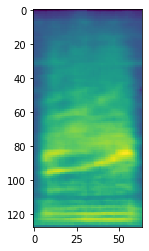

In [91]:
plt.imshow(imgs[0])

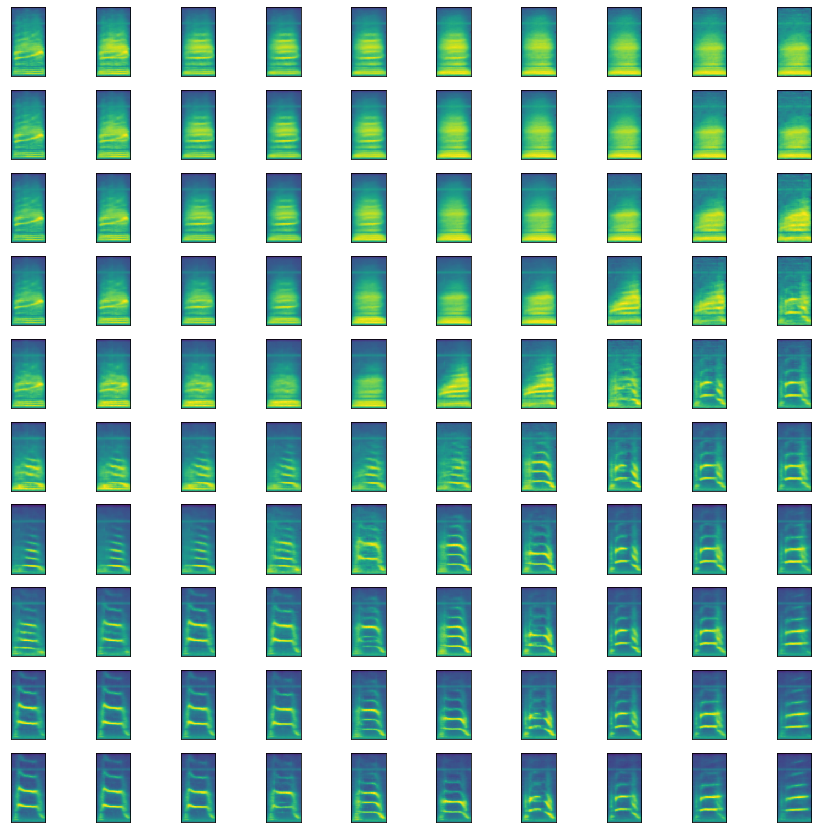

In [98]:
fig =plt.figure(figsize=(15,15))
idx=1
for img in imgs:

    plt.subplot(10,10,idx)
    plt.imshow(img)
    idx+=1
    plt.xticks([])
    plt.yticks([])

plt.show()